## Определение успешность игр на основе данных.

*  [Исследование данных](#1.-Исследование-данных)
     1. Исследование информации по датасету.

* [Предобработка данных](#2.-Предобработка-данных)
    [1. Поиск дубликатов и пропущенных значений.](#Поиск-дубликатов)
    
    [2. Замена типов данных и приведение столбцов к нижнему регистру.](#Замена-типов-данных)
    
    [3. Суммирование столбцов.](#Суммирование-столбцов)

*  [Исследовательский анализ](#3.-Исследовательский-анализ)
    [1. Создание столбца по топ платформам.](#Создание-столбца)
    
    [2. Создание датасета за 2016 год.](#Создание-датасета)
    
    [3. Определение корреляций между оценками и выручкой.](#Определение-корреляций)

*  [Определение портрета пользователей](#4.-Определение-портрета-пользователей)
    1. Создание датасета по выручке для каждого региона.

*  [Проверка гипотез](#5.-Проверка-гипотез)
    [1. Сравнение средних оценок пользователей по платформам.](#Сравнение-средних-оценок)
    
    [2. Сравнение средних оценок пользователей по жанрам.](#Сравнение-средних-оценокп)

* [Общий вывод](#6.-Общий-вывод)

### 1. Исследование данных

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
from pymystem3 import Mystem 
from matplotlib import pyplot as plt
from scipy.stats import spearmanr
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
m = Mystem()
# Импортируем нужные библиотеки для проекта

In [1]:
# Открытие данных с помощью read_csv(),
# выводится информация по столбцам методом info()

#### Структура данных:
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

### 2. Предобработка данных

#### Поиск дубликатов

In [ ]:
# Также проверяем методом duplicated() наличие дубликатов и методом isna() пропущенные значения

#### Замена типов данных

In [ ]:
# Приводим названия столбцов к нижнему регистру методом lower(), 
# также проверяем на корректность значение в столбце user_score, методом to_numeric()

#### В столбце user_score заменил тип данных с str на float, так же в столбце значение tbd заменилось на пропущенное, так как это не определенная оценка. Остальные пропуски не изменял, так как замена может исказить данные.

#### Суммирование столбцов

In [ ]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
# Суммируем выручку по столбцам регионов

#### Суммировал продажи по всем регионам.

### 3. Исследовательский анализ

#### Создание столбца

Text(0.5, 0, 'Год релиза')

Text(0, 0.5, 'Продажи в млн')

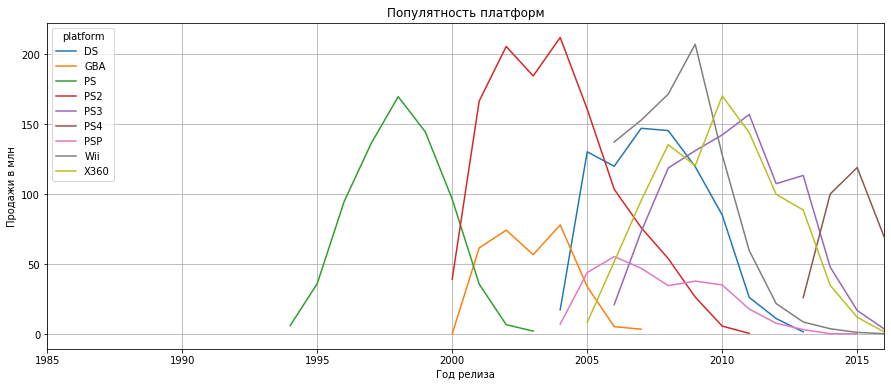

In [6]:
# Создаем сводную таблицу по сумме продаж выше средней по регионам, по платформам 
# Далее делаем срез по этим платформам и через сводную таблицу строим димамику по платформам

#### По данным топовых игровых платформ, продажи и соответственно популярность каждой платформы в среднем растут 4 года и также в среднем 4 года падают после пика продаж.

#### Создание датасета

In [7]:
df_actual = df.query('year_of_release == 2016').reset_index(drop=True)
# Здесь делаем срез общей таблицы по 2016 году

In [8]:
top_actual_platform = (
    df_actual
    .pivot_table(index=['platform'], values=['total_sales'],aggfunc='sum')
    .reset_index()
    .query('total_sales >= total_sales.mean()')
)
t = top_actual_platform['platform']

actual_platform = (df_actual
    .query('platform in @t')
    .pivot_table(index=['name'],columns=['platform'], values=['other_sales'],aggfunc='sum')
)
# Также по срезу 2016 года создаем сводную таблицу по сумме продаж выше средней по регионам, по платформам 
# Далее делаем срез по платформам и названию игр в сводной таблице

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


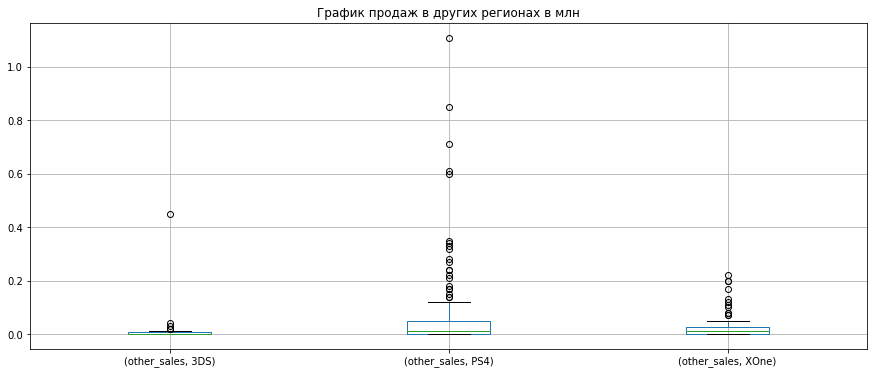

In [9]:
# И через сводную таблицу строим ящик с усами по топ 3 платформам и продаж по ним 

#### За 2016 год по глобальным продажам, на платформе 3DS в основном продаж практически нету , на PS4 по средние продажи  на платформе, также имеется большое расхождения продаж по играм. На XOne продаж практически нету и расхождения продаж по играм не большое.

In [10]:
# Заносим топ 3 платформы в отдельную переменную

#### Определение корреляций

0.3733649712783034

-0.122461124196492

-0.1303029975447243

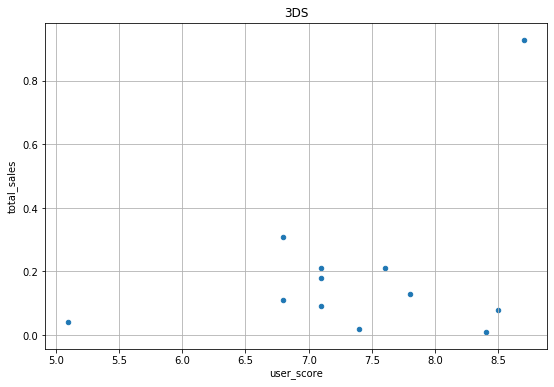

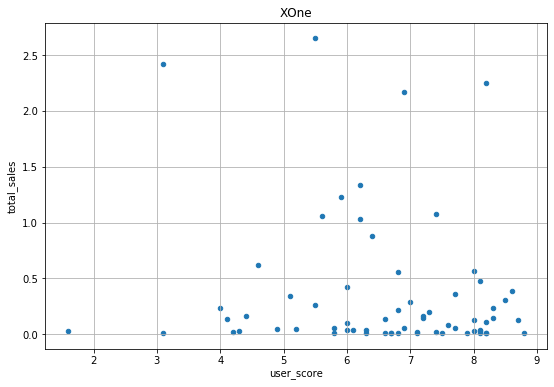

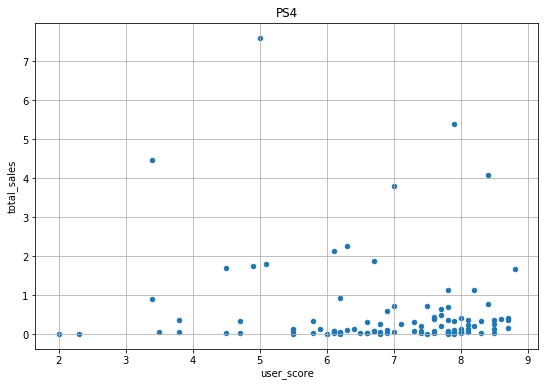

In [11]:
# Строим диаграмму рассеяния по оценке пользователей и платформе, также определяем корреляцию по оценке и продажам по платформе

#### За 2016 год взаимосвязь между продажами и оценкой пользователей, по платформе 3DS средняя, по платформе PS4 практически нету, по платформе XOne также практически нету. На платформе 3DS основная часть игр с оценками от 7-8 баллов, платформе PS4 основная часть игр с оценками от 7-9 баллов,  платформе XOne основная часть игр с оценками от 7-9 баллов. 

0.33840848355747477

0.37569493421469646

0.41200525431688656

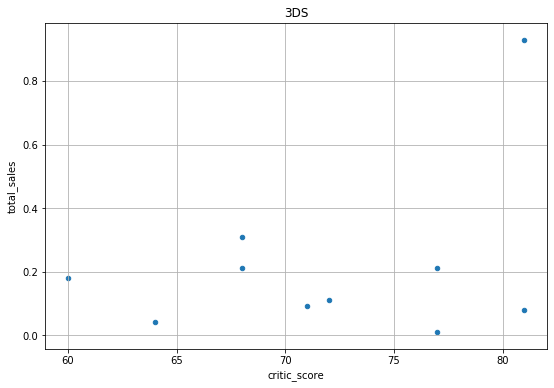

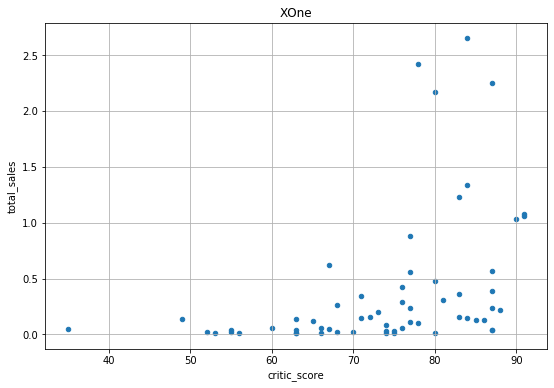

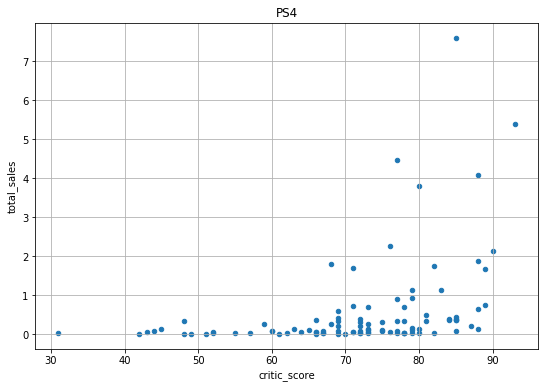

In [12]:
# Также строим диаграмму рассеяния по оценке экспертов и платформе, также определяем корреляцию по оценке экспертов и продажам по платформе

#### За 2016 год взаимосвязь между продажами и оценкой критиков, по платформе 3DS средняя, по платформе PS4 средняя, по платформе XOne также средняя. На платформе 3DS основная часть игр с оценками от 65-75 баллов, платформе PS4 основная часть игр с оценками от 70-90 баллов,  платформе XOne основная часть игр с оценками от 70-90 баллов. 

Text(0, 0.5, 'total_sales')

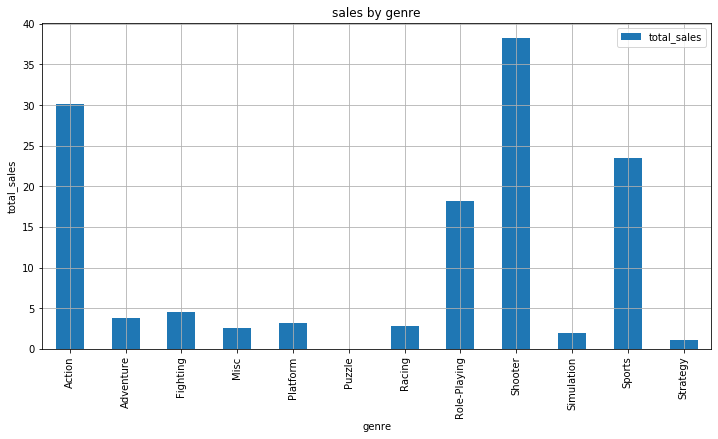

In [13]:
genre = df_actual.pivot_table(index=['genre'], values=['total_sales'], aggfunc='sum').reset_index()
ax = genre.plot.bar(x='genre',y='total_sales', grid=True, figsize=(12, 6), title='sales by genre')
ax.set_ylabel('total_sales')
# С помощью сводной таблицы и по ней строим столбчатый график по жанрам и продажам

#### На основе графика за 2016 год самые большие продажи это жанры Shooter, Action, Sports, а с наменьшими продажами  это Misc, Simulation, Strategy. Жанры с большими продажами и жанры с небольшими продажами сильно различаются.

### 4. Определение портрета пользователей

In [ ]:
# С помощью групировки создаем переменную по платформам и сумме продаж по регионам
# Также с помощью функции считаем долю выручки по регионам от общей продажи

#### В Северной Америке больше всего продаются игры по платформам X360, доля продаж 68% относительно 3 регионов, далее PS2	доля продаж 54%, Wii доля продаж 59%.
#### В Японии больше всего продаются игры по платформам DS, доля продаж 23% относительно 3 регионов, далее PS доля продаж 20%, PS2 доля продаж 13%.
#### В Европе больше всего продаются игры по платформам PS2, доля продаж 31% относительно 3 регионов, далее PS3 доля продаж 41%, X360 доля продаж 30%.

In [ ]:
# С помощью групировки создаем переменную по жанрам и сумме продаж по регионам
# Также с помощью функции считаем долю выручки по регионам от общей продажи

#### В Северной Америке больше всего продаются игры с жанрами Action, доля продаж 56% относительно 3 регионов, далее Sports доля продаж 57%, Shooter доля продаж 62%.
#### В Японии больше всего продаются игрыс жанрами Role-Playing, доля продаж 40% относительно 3 регионов, далее Action доля продаж 10%, Sports доля продаж 11%.
#### В Европе больше всего продаются игры с жанрами Action, доля продаж 33% относительно 3 регионов, далее Sports доля продаж 31%, Shooter доля продаж 33%.

In [ ]:
# С помощью групировки создаем переменную по рейтингу платформ и сумме продаж по регионам

#### В Северной Америке топ 3 рейтинга с наибольшими продажами от организации ESRB это 1 - E,  2 - T,  3 - M.
#### В Японии топ 3 рейтинга с наибольшими продажами от организации ESRB это 1 - E,  2 - T,  3 - M.
#### В Европе топ 3 рейтинга с наибольшими продажами от организации ESRB это 1 - E,  2 - M,  3 - T.

### 5. Проверка гипотез

#### Сравнение средних оценок

#### Проверка гипотез на сколько равна или не равна средняя оценка пользователей по платформе XOne с оценкой платформы PC.
#### Нулевая гипотеза: средние оценки пользователей по платформам равны
#### Альтернативная гипотеза: средние оценки пользователей по платформам не равны

In [17]:
print('p-value: ', result.pvalue)

if result.pvalue < alpha:
    print('Альтернативная гипотеза')
else:
    print('Нулевая гипотеза')
# С помощью метода ttest_ind для массива данных проводим тест на различие двух групп

p-value:  4.935072360183565e-06
Альтернативная гипотеза


#### По данным теста средняя оценка платформы XOne не равна оценке платформы PC,если равны то будет нулевая гипотеза, если не равны, то альтернативная.

#### Сравнение средних оценок

#### Проверка гипотез на сколько равна или не равна средняя оценка пользователей по жанру Action и с оценкой жанра Sports.
#### Нулевая гипотеза: средние оценки пользователей по жанрам равны
#### Альтернативная гипотеза: средние оценки пользователей по жанрам не равны

In [18]:
print('p-value: ', result.pvalue)

if result.pvalue < alpha:
    print('Альтернативная гипотеза')
else:
    print('Нулевая гипотеза')
# С помощью метода ttest_ind для массива данных проводим тест на различие двух групп

p-value:  0.11483818791498286
Нулевая гипотеза


#### По данным теста средняя оценка жанра Action равна в большой вероятностью средней оценке жанра Sports.

### 6. Общий вывод

#### По данному исследованию выявленно следующее, средний рост популярности платформ с наибольшими продажами составляет 4 года,за 2016 год по глобальным продажам лидируют 3DS, PS4 и XOne, за 2016 года по миру самые популярные жанры Shooter, Action и Sports, а с наменьшими продажами это Misc, Simulation, Strategy.
#### Продажи в Северной америке по топ платформам X360, доля продаж 68% относительно 3 регионов, далее PS2	доля продаж 54%, Wii доля продаж 59%.
#### Продажи в Японии по топ платформам DS, доля продаж 23% относительно 3 регионов, далее PS доля продаж 20%, PS2 доля продаж 13%.
#### Продажи в Европе по топ платформам PS2, доля продаж 31% относительно 3 регионов, далее PS3 доля продаж 41%, X360 доля продаж 30%. 
#### Самые попурные рейтинги от организации ESRB это E, T и M.
####  Продажи в Северной америке, топ жанры Action, доля продаж 56% относительно 3 регионов, далее Sports доля продаж 57%, Shooter доля продаж 62%.
#### Продажи в Японии, топ жанры Role-Playing, доля продаж 40% относительно 3 регионов, далее Action доля продаж 10%, Sports доля продаж 11%.
#### Продажи в Европе, топ жанры Action, доля продаж 33% относительно 3 регионов, далее Sports доля продаж 31%, Shooter доля продаж 33%.
#### На платформе 3DS основная часть игр с оценками от 65-75 баллов, платформе PS4 основная часть игр с оценками от 70-90 баллов, платформе XOne основная часть игр с оценками от 70-90 баллов.
#### На платформе 3DS основная часть игр с оценками от 7-8 баллов, платформе PS4 основная часть игр с оценками от 7-9 баллов, платформе XOne основная часть игр с оценками от 7-9 баллов.